# <center>Using psyplot for visualizing unstructured data and vertical transects</center>

<div>
    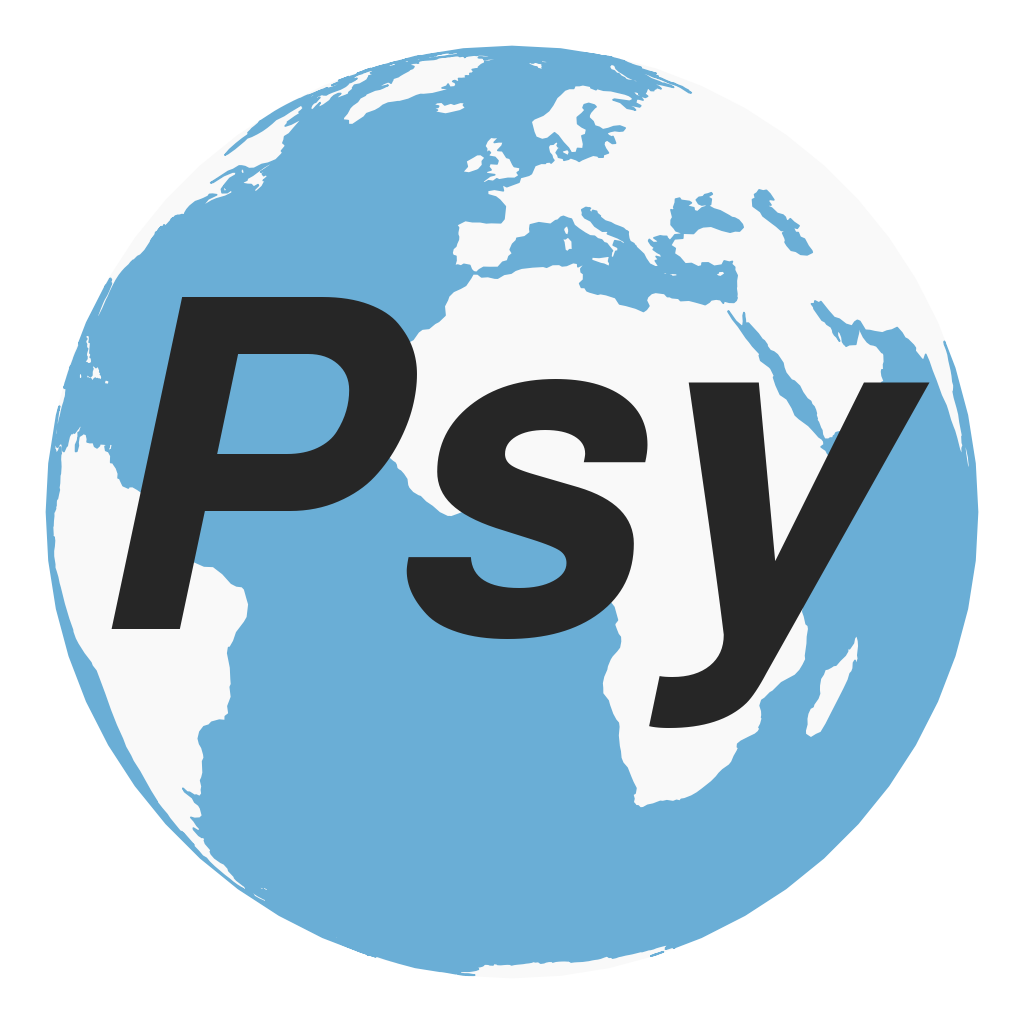
</div>

## KS Seminar

Philipp S. Sommer

Helmholtz-Zentrum Hereon,
Helmholtz Coastal Data Center

February 1st, 2024

[Help](#/2/0)

## Technical Note <a id='help'></a>

This presentation is a jupyter notebook presented with [rise][rise] for interactive execution of the cells.
You can run it interactively on mybinder in your browser: 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Chilipp/psyplot-KS-Seminar-20240201/main?filepath=psyplot-framework-presentation.ipynb)

The link to the repo on Github: https://github.com/Chilipp/psyplot-KS-Seminar-20240201).

[Back to first slide](#/0/0)

[rise]: https://rise.readthedocs.io

So let's import some libraries for the execution

In [ ]:
%matplotlib widget

import psyplot.project as psy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from IPython.display import display, Video

from ipympl.backend_nbagg import Canvas
Canvas.header_visible.default_value = False

import warnings

## Outline

### Overview on psyplot

### Main features of psyplot

### Unstructured Grids

### Vertical Transects

## psyplot in one slide

> **An interactive netCDF data visualization and analysis library, based upon `matplotlib` and `xarray`**

- the `psyplot` package is the core of the framework, visualization methods are implemented in plugins
- `formatoption`s control the appearance of the plot or the data that is shown
- multiple `formatoption` together make up a plotter for a specific type of visualization
  - one plotter for line plots
  - one plotter for scalar 2D plots
  - one plotter for scalar 2D plots on a map
  - one plotter for vector data (i.e. data with u and v component)
  - ...
- object-oriented approach
  - each formatoption and each plotter represents one class
  - formatoption can be combined to handle more complex configuration tasks
- `psyplot` API can be used 
  - from the command-line
  - in python scripts (or jupyter notebooks)
  - in a desktop application

<h2 class="section-heading">Main features of psyplot</h2>

## Using psyplot from Python

In [ ]:
ds = psy.open_dataset("data/icon_grid_demo.nc")
ds

In [ ]:
sp = ds.psy.plot.mapplot(
    name="t2m",
)

## Working interactively from the command line

In [ ]:
sp = ds.psy.plot.mapplot(
    name="t2m", cmap="Blues",
)

In [ ]:
sp.update(cmap="Reds")

In [ ]:
sp.update(title="%(time)s")

In [ ]:
sp.update(time=3)

In [ ]:
sp.update(lonlatbox="Europe")

In [ ]:
psy.close("all")

## Using the GUI

psyplot comes with a flexible graphical user interface (GUI).

- On mybinder: click [here](../desktop).
- On mistral:
  
  - either via X11
      ```bash
      ssh -X mistral
      module load python3
      psyplot
      ```
- On your on own working station: Install it via `conda install -c conda-forge psy-view`

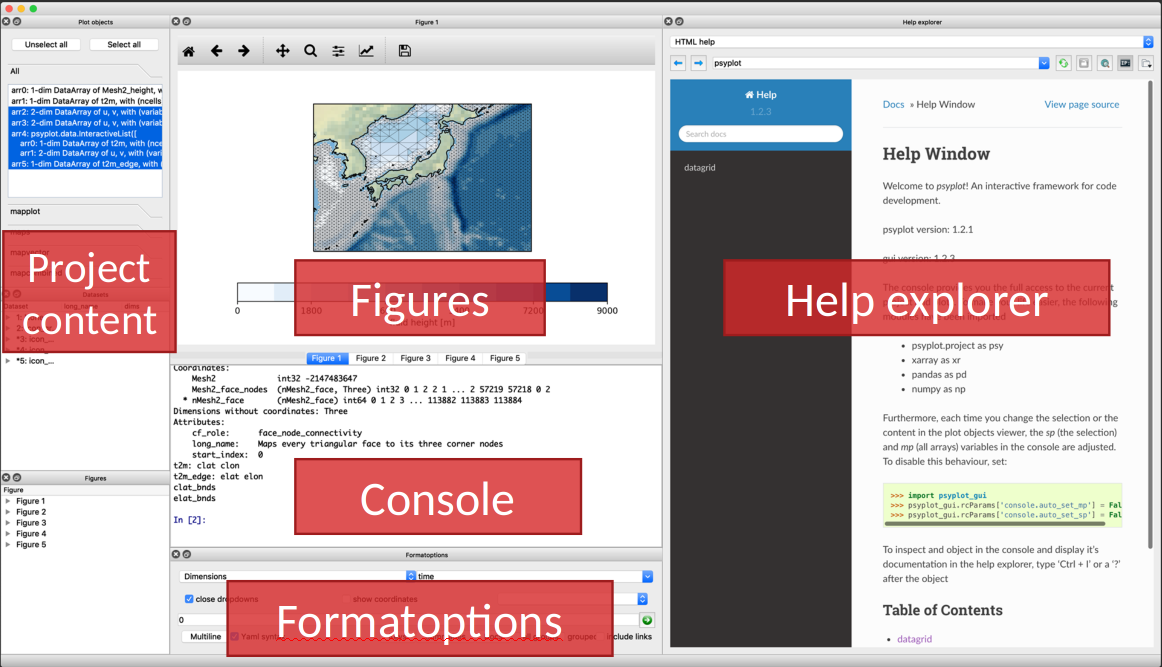

## psy-view

### An ncview-like interface, but with psyplot

- quick access to netcdf-variables via buttons
- switch between projections
- modify basemap
- change labels, colormaps, etc.
- display time-series when clicking on the map
- load presets for your plots
- animate through time, z, etc.

https://psyplot.github.io/psy-view

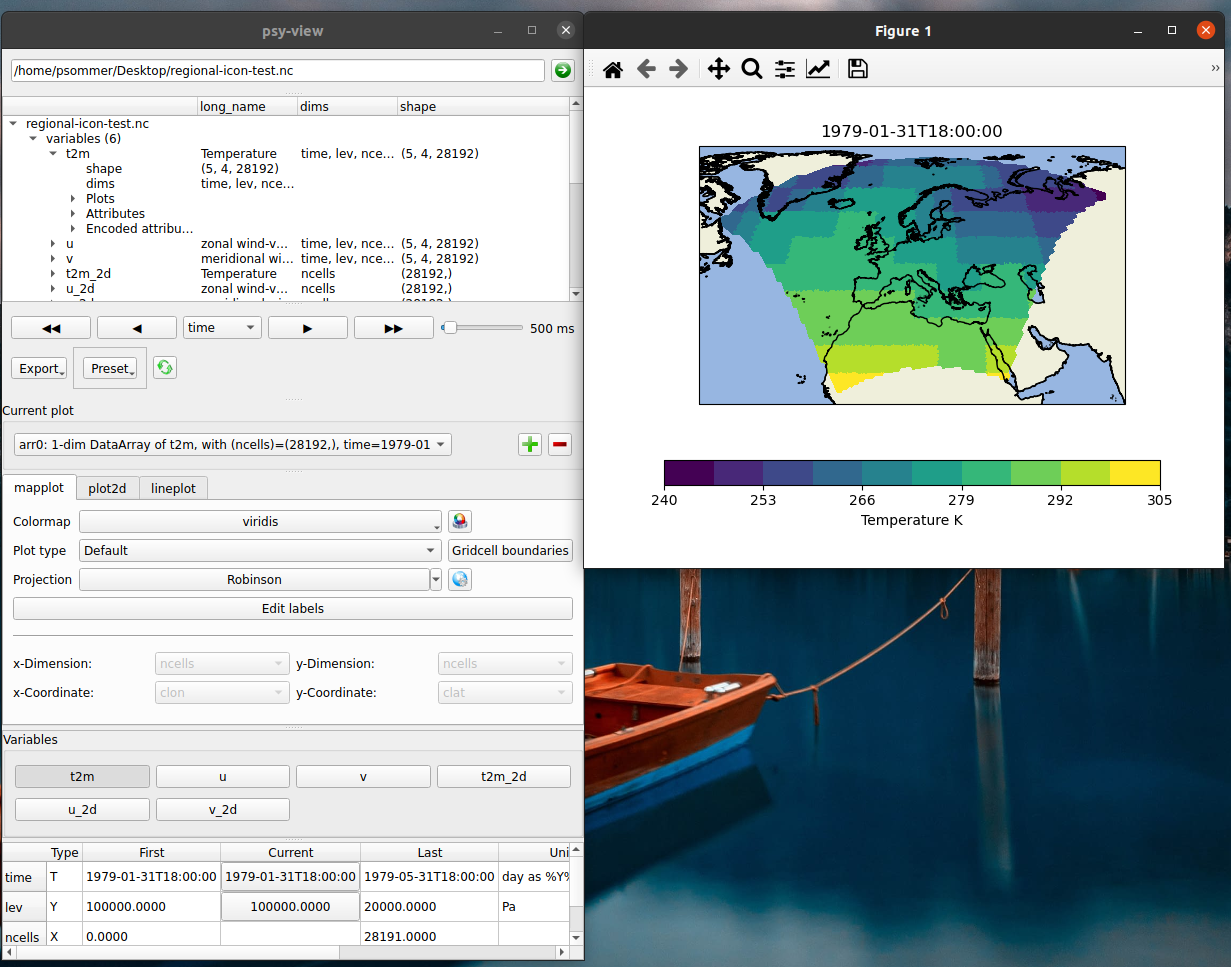

## The psyplot GUI

### Flexible GUI for coding and clicking

- integrated IPython console for interactive use of the command line
- connected help window that renders help and python object documentation
- integrated psy-view window
- shortcut widgets for individual formatoptions

https://psyplot.github.io/psyplot-gui

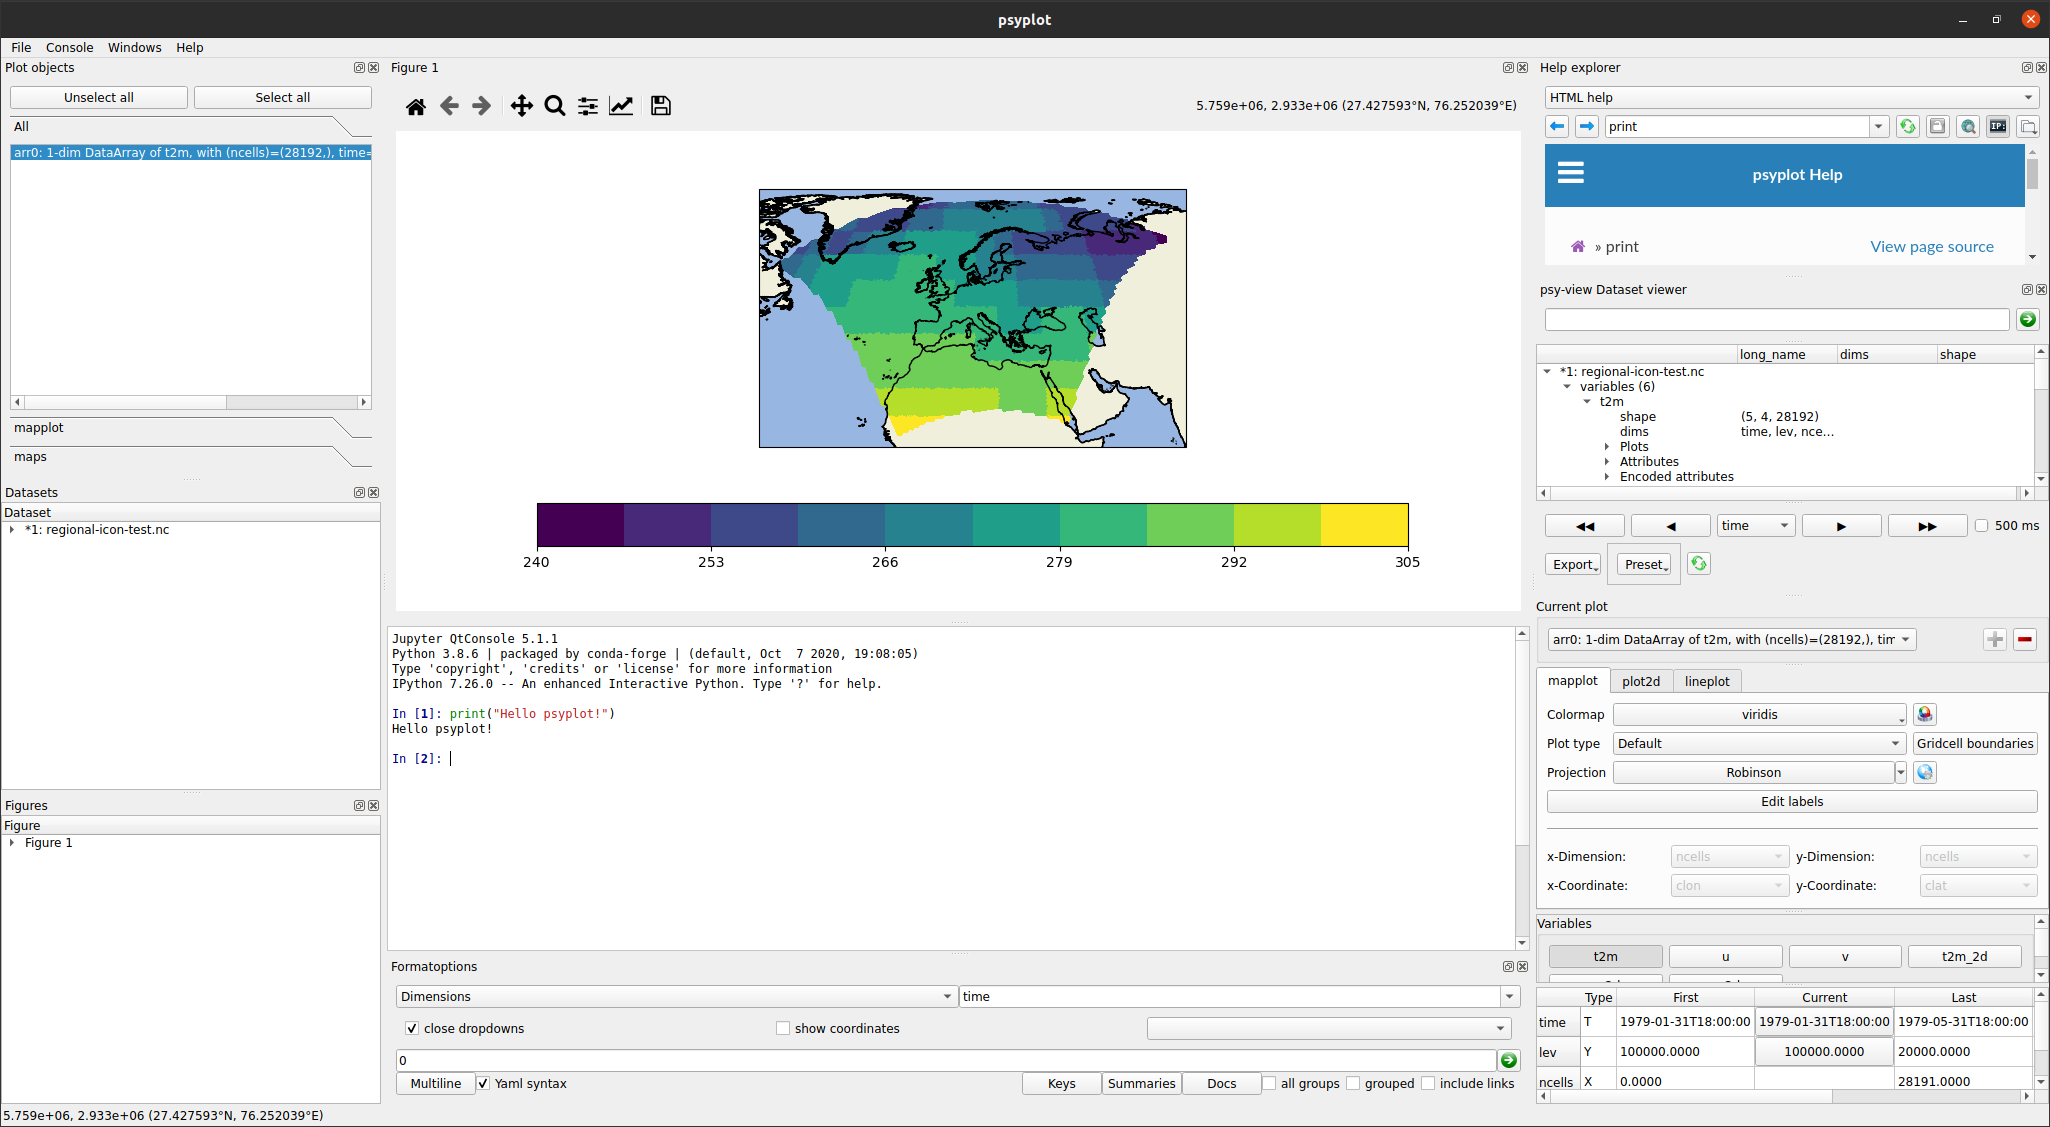

## Plugins for visualization

psyplot is the core that defines the framework (Plotter, Formatoption, Project, CFDecoder), the plot methods are implemented by plugins:

- `psy-simple`: for standard 1D and 2D plot
    * e.g. lineplot, plot2d, vector, barplot
- `psy-maps`: for georeferenced plots (i.e. maps)
    * e.g. mapplot, mapvector, etc.
- `psy-reg`: for regression analysis
    * linreg, densityreg

---

## New plugins

- `psy-ugrid`: for decoding UGRID conventions
- `psy-transect`: for extracting, visualizing and analyzing vertical transects

In [ ]:
psy.plot.show_plot_methods()

## They already have a lot of formatoptions available

In [ ]:
psy.plot.mapplot.keys(grouped=True)

<h2 class="section-heading">Unstructured Grids</h2>

## The basics about the ICON Grid

- 1D variables
- 1D coordinates

---
- 2D bounds variable

--- 
not supported by standard matplotlib and cartopy approach

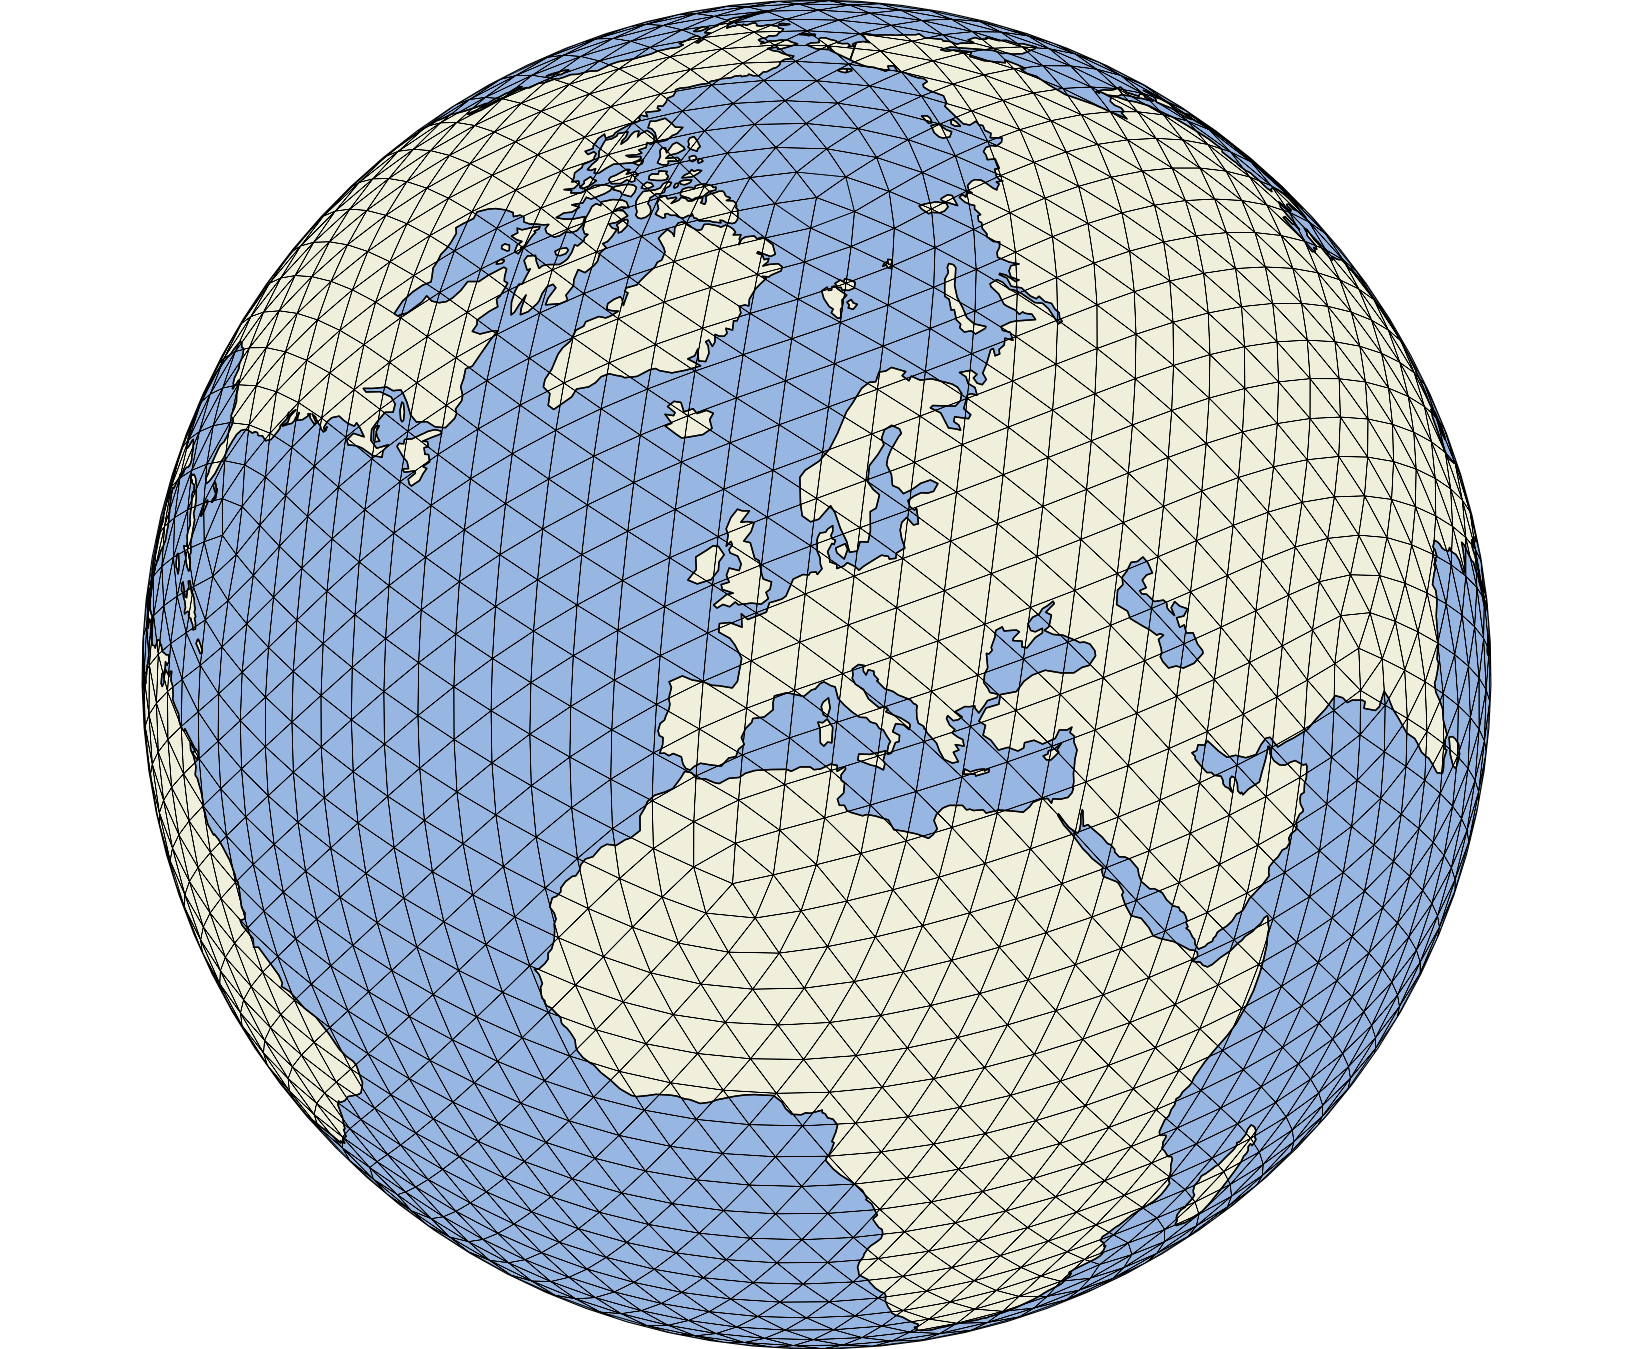

## Edges and Faces


<table style="width: 100%;">
    <tr>
        <th style="width: 50%; text-align: center">triangular</th>
        <th style="width: 50%; text-align: center">edge grid</th>
    </tr>
</table>

In [ ]:
# courtesy of Ralf Müller, MPI-M
with psy.open_dataset("data/icon.nc") as ds:
    display(ds)

In [ ]:
# courtesy of Ralf Müller, MPI-M
with psy.open_dataset("data/icon-edge.nc") as ds:
    display(ds)

## Decoding unstructured information

In [ ]:
!psyplot data/icon.nc -n t2m -i

In [ ]:
!psyplot ../ugrid-testfiles/schout_181_fixed.nc -n temp -i

## Visualization with psyplot

In [ ]:
sp = psy.plot.mapplot(
    "data/icon_grid_demo.nc", # the input
    name="t2m", t=1,  # what shall be plotted
    cmap="Reds",      # formatoptions
)

In [ ]:
# update the projection 
# this can take any cartopy projection, but we
# have a couple of shortcuts
sp.update(projection="ortho")

In [ ]:
# change the lonlatbox
sp.update(lonlatbox="Europe")
sp.draw()

In [ ]:
# mask certain values
sp.update(maskleq=280)

In [ ]:
# set a title
sp.update(title="Month: %B %Y")

In [ ]:
sp.update(google_map_detail=4)

In [ ]:
psy.close('all')

## UGRID conventions

> **ICON files contain the grid information as grid cell boundaries, UGRID stores the mesh connectivity**

### Mesh

```
	int Mesh2 ;
		Mesh2:cf_role = "mesh_topology" ;
		Mesh2:long_name = "Topology data of 2D unstructured mesh" ;
		Mesh2:topology_dimension = 2 ;
		Mesh2:node_coordinates = "Mesh2_node_x Mesh2_node_y" ;
		Mesh2:face_node_connectivity = "Mesh2_face_nodes" ;
```

In [ ]:
!ncdump -h data/simple_triangular_grid_si0.nc

## psy-ugrid: Visualizing triangular and flexible grids

- new repository open-source on GitLab: https://codebase.helmholtz.cloud/psyplot/psy-ugrid/
- efficient computation of the dual node or edge mesh solely
- integrated into psyplots decoding framework

In [ ]:
ds = psy.open_dataset("data/simple_triangular_grid_si0.nc")
ds.Mesh2_fcvar.psy.decoder

---


In [ ]:
ds.psy.plot.mapplot(name="Mesh2_fcvar")

In [ ]:
ds.psy.plot.mapplot(name="Mesh2_ndvar")

## Visualizing flexible grids

The UGRID conventions support flexible meshes, i.e. mixes of triangles, rectangles, hexagonals, etc.

In [ ]:
ds = psy.open_dataset("data/simple_flexible_grid_si0.nc")

In [ ]:
ds.psy.plot.mapplot(name="Mesh2_fcvar")

In [ ]:
ds.psy.plot.mapplot(name="Mesh2_ndvar")

## This works efficiently for all unstructured grids

In [ ]:
ds = psy.open_dataset("../ugrid-testfiles/schout_181_fixed.nc")
ds.psy.plot.mapplot(name="temp", lsm="10m", z=-1)

In [ ]:
psy.close("all")

<h2 class="section-heading">Transects</h2>

## Analysing horizontal and vertical transects

### psy-transect 

- interpolate rastered (or unstructured) data on to a path.
- display vertical profiles (with respect to orography, if available)
- supports vector (wind) or scalar fields (temperature)
- made for interactive usage

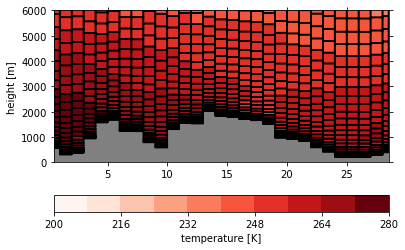

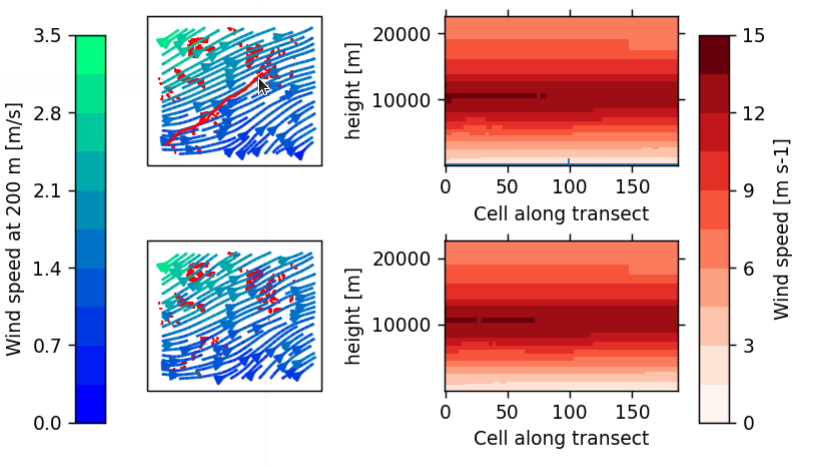

## COSMO-CLM data (standard case)

In [ ]:
temperature_ds = psy.open_dataset("data/T.nc")
temperature_ds.psy.plot.horizontal_maptransect(
    name="T",
    transect=0,
    cmap="Reds",
    title="Layer at height %(transect)1.2f m",
)

In [ ]:
sp = temperature_ds.psy.plot.vertical_maptransect(
    name="T",
    plot="poly",
    background="0.5",
    datagrid="k-",
    transform="cyl",
)
p1, p2 = psy.gcp(True).plotters
p1.connect_ax(p2)
p2.connect_ax(p1)

In [ ]:
psy.close("all")

## COSMO-CLM with vertical level information

In [ ]:
from psy_transect import utils

temperature_ds = psy.open_dataset("data/T.nc")
orography = psy.open_dataset("data/lffd1980010100c.nc").psy.HHL.psy[0]

new_ds = utils.mesh_to_cf_bounds(orography, "level1", "level", temperature_ds)
new_ds.psy.plot.horizontal_maptransect(
    name="T",
    transect=0,
    cmap="Reds",
    title="Layer at height %(transect)1.2f m",
)


In [ ]:
sp = new_ds.psy.plot.vertical_maptransect(
    name="T",
    plot="poly",
    background="0.5",
    datagrid="k-",
    transform="cyl",
    xlim="minmax",
    ylim=(0, 6000),
    yticks=np.linspace(0, 6000, 7),
)

p1, p2 = psy.gcp(True).plotters
slider = p1.connect_ax(p2)
p2.connect_ax(p1)


In [ ]:
psy.close("all")

## ICON-CLM extraction

In [ ]:
icon_ds = psy.open_dataset("data/icon_19790101T000000Z.nc")
orography = psy.open_dataset("data/icon_19790101T000000Zc.nc").psy.HHL

new_ds = utils.mesh_to_cf_bounds(orography, "height", "height_2", icon_ds)

new_ds["clon"] = new_ds.clon.copy(data=np.rad2deg(new_ds.clon))
new_ds["clat"] = new_ds.clat.copy(data=np.rad2deg(new_ds.clat))
del new_ds["clon"].attrs["units"]
del new_ds["clat"].attrs["units"]
new_ds["clat_bnds"] = new_ds.clat_bnds.copy(data=np.rad2deg(new_ds.clat_bnds))
new_ds["clon_bnds"] = new_ds.clon_bnds.copy(data=np.rad2deg(new_ds.clon_bnds))

encodings = {v: var.encoding for v, var in new_ds.variables.items()}
attrs = {v: var.attrs for v, var in new_ds.variables.items()}
new_ds = new_ds.where(new_ds.HHL.notnull().any("height_2"), drop=True)
for v, enc in encodings.items():
    new_ds[v].encoding.update(enc)

for v, att in attrs.items():
    new_ds[v].attrs.update(att)
new_ds.psy.plot.horizontal_maptransect(
    name="temp",
    transect=0,
    cmap="Reds",
    decoder={"z": {"HHL"}},
    title="Layer at height %(transect)1.2f m",
)

In [ ]:
sp = new_ds.psy.plot.vertical_maptransect(
    name="temp",
    background="0.5",
    datagrid="k-",
    transect_resolution=0.1,
    decoder={"z": {"HHL"}},
    xlim="minmax",
    ylim=(0, 6000),
    yticks=np.linspace(0, 6000, 7),
)

p1, p2 = psy.gcp(True).plotters
p1.connect_ax(p2)
p2.connect_ax(p1)

In [ ]:
psy.close("all")

## Vertical transect of SCHISM output

In [ ]:
ds = psy.open_dataset("../ugrid-testfiles/schout_181_fixed.nc")
sp = ds.psy.plot.horizontal_maptransect(
    name="salt",
    transect=0,
    cmap="viridis",
    title="Layer at depth %(transect)s",
    decoder={
        "x": {"SCHISM_hgrid_node_x"},
        "y": {"SCHISM_hgrid_node_y"},
        "z": {"nSCHISM_vgrid_layers"},
    },
    lsm="10m",
    lonlatbox=list(
        (
            9.395659165921904,
            10.151979210901716,
            53.45349288848263,
            53.80016073336971,
        )
    ),
    map_extent="data",
    google_map_detail=9,
)

In [ ]:


ds.psy.plot.vertical_maptransect(
    name="salt",
    plot="poly",
    transect_resolution=1.0,
    decoder={
        "x": {"SCHISM_hgrid_node_x"},
        "y": {"SCHISM_hgrid_node_y"},
        "z": {"nSCHISM_vgrid_layers"},
    },
)
p1, p2 = psy.gcp(True).plotters
p1.connect_ax(p2)
p2.connect_ax(p1)


In [ ]:
psy.close("all")

## Summary

- the psyplot core for the data model, and plugins for various visualizations
- designed to be flexible and sustainable
- equipped via flexible graphical user interface

### The data model
- based on a netCDF-like infrastructure and interpretes CF- and UGRID conventions
- support for multiple grids: rectilinear, circumpolar and unstructured

### Flexibility
- convenient python API
- usage via GUI and psy-view
- usage from the command-line

### New plugins

- `psy-ugrid` decodes UGRID conventions and (if necessary) computes the dual mesh for visualization on the native grid
- `psy-transect` provides interactive analysis features for horizontal and vertical transects

### Important changes

- **all psyplot repositories have been moved to https://codebase.helmholtz.cloud/psyplot**
- **New releases with compatibility fixes for all psyplot libraries will come soon**
- **Changes will be announced on the psyplot mailinglist: https://www.listserv.dfn.de/sympa/info/psyplot**